In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [440]:
df = pd.read_csv('passengers2.csv')

In [441]:
df[:15]

,Month,reference,target,missing
0,1949-01-01,112,112.0,NaN
1,1949-02-01,118,118.0,NaN
2,1949-03-01,132,132.0,NaN
3,1949-04-01,129,NaN,129.0
4,1949-05-01,121,121.0,NaN
5,1949-06-01,135,135.0,NaN
6,1949-07-01,148,148.0,NaN
7,1949-08-01,148,NaN,148.0
8,1949-09-01,136,136.0,NaN
9,1949-10-01,119,NaN,119.0


In [442]:
df['Month'] = pd.to_datetime(df['Month'])

In [443]:
# 1
df['target_shift_1'] = df['target'].fillna(df['target'].shift(periods=1).fillna(method='ffill'))
df[:15]

,Month,reference,target,missing,target_shift_1
0,1949-01-01,112,112.0,NaN,112.0
1,1949-02-01,118,118.0,NaN,118.0
2,1949-03-01,132,132.0,NaN,132.0
3,1949-04-01,129,NaN,129.0,132.0
4,1949-05-01,121,121.0,NaN,121.0
5,1949-06-01,135,135.0,NaN,135.0
6,1949-07-01,148,148.0,NaN,148.0
7,1949-08-01,148,NaN,148.0,148.0
8,1949-09-01,136,136.0,NaN,136.0
9,1949-10-01,119,NaN,119.0,136.0


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           144 non-null    datetime64[ns]
 1   reference       144 non-null    int64         
 2   target          116 non-null    float64       
 3   missing         28 non-null     float64       
 4   target_shift_1  144 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 5.8 KB


In [445]:
# 2
df['roll_mean_2'] = df.target.fillna(df['target'].rolling(window=3, min_periods=1).mean())
df[:15]

,Month,reference,target,missing,target_shift_1,roll_mean_2
0,1949-01-01,112,112.0,NaN,112.0,112.0
1,1949-02-01,118,118.0,NaN,118.0,118.0
2,1949-03-01,132,132.0,NaN,132.0,132.0
3,1949-04-01,129,NaN,129.0,132.0,125.0
4,1949-05-01,121,121.0,NaN,121.0,121.0
5,1949-06-01,135,135.0,NaN,135.0,135.0
6,1949-07-01,148,148.0,NaN,148.0,148.0
7,1949-08-01,148,NaN,148.0,148.0,141.5
8,1949-09-01,136,136.0,NaN,136.0,136.0
9,1949-10-01,119,NaN,119.0,136.0,136.0


In [446]:
def linear_interpolation(df):
    for i in range(len(df)):
        if np.isnan(df['Own_target_inter_3'][i]): 
            x0 = df.index[i - 1]  # левая (месяц)
            y0 = df['Own_target_inter_3'][i - 1]  # само значение слева
            x1 = df.index[i + 1]  # правая (месяц)
            y1 = df['Own_target_inter_3'][i + 1]  # само значение справа
            
            dx = (x1 - x0).days  # по времени (в днях)
            dy = y1 - y0  # по значению
            try:
                df['Own_target_inter_3'][i] = round(y0 + (dy / dx) * (df.index[i] - x0).days)
            except:
                continue
    df.Own_target_inter_3 = df.Own_target_inter_3.fillna(df['Own_target_inter_3'].mean())
    return df

In [447]:
df['Own_target_inter_3'] = df.target

df.set_index('Month', inplace=True)

df = linear_interpolation(df)

In [448]:
df['target_inter_3'] = df['target'].interpolate(method='linear')
df[:15]

,reference,target,missing,target_shift_1,roll_mean_2,Own_target_inter_3,target_inter_3
Month,,,,,,,
1949-01-01,112,112.0,NaN,112.0,112.0,112.0,112.0
1949-02-01,118,118.0,NaN,118.0,118.0,118.0,118.0
1949-03-01,132,132.0,NaN,132.0,132.0,132.0,132.0
1949-04-01,129,NaN,129.0,132.0,125.0,126.0,126.5
1949-05-01,121,121.0,NaN,121.0,121.0,121.0,121.0
1949-06-01,135,135.0,NaN,135.0,135.0,135.0,135.0
1949-07-01,148,148.0,NaN,148.0,148.0,148.0,148.0
1949-08-01,148,NaN,148.0,148.0,141.5,142.0,142.0
1949-09-01,136,136.0,NaN,136.0,136.0,136.0,136.0


In [449]:
df.isna().sum()

reference               0
target                 28
missing               116
target_shift_1          0
roll_mean_2             0
Own_target_inter_3      0
target_inter_3          0
dtype: int64

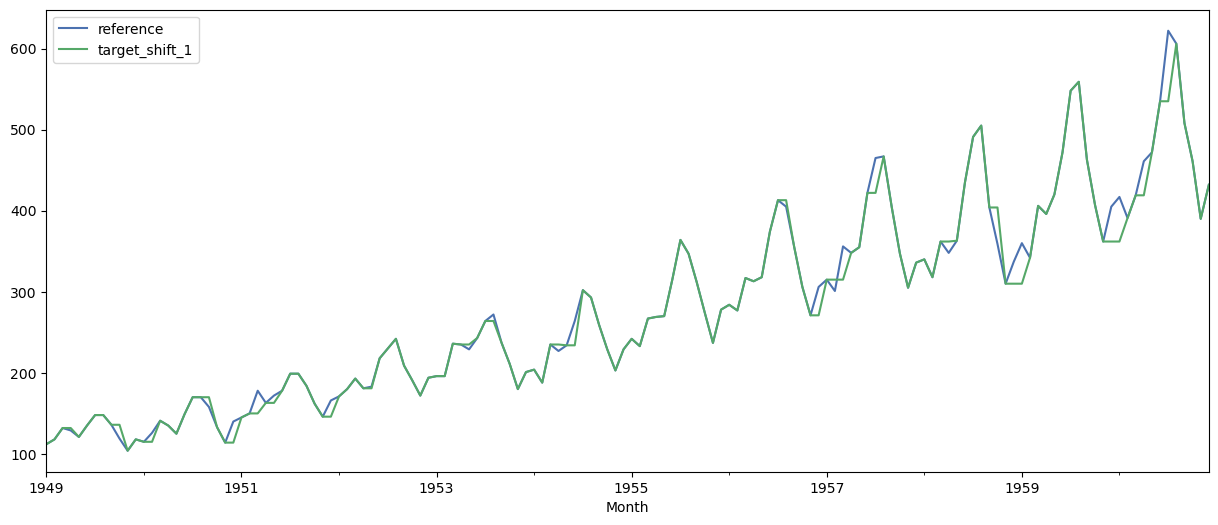

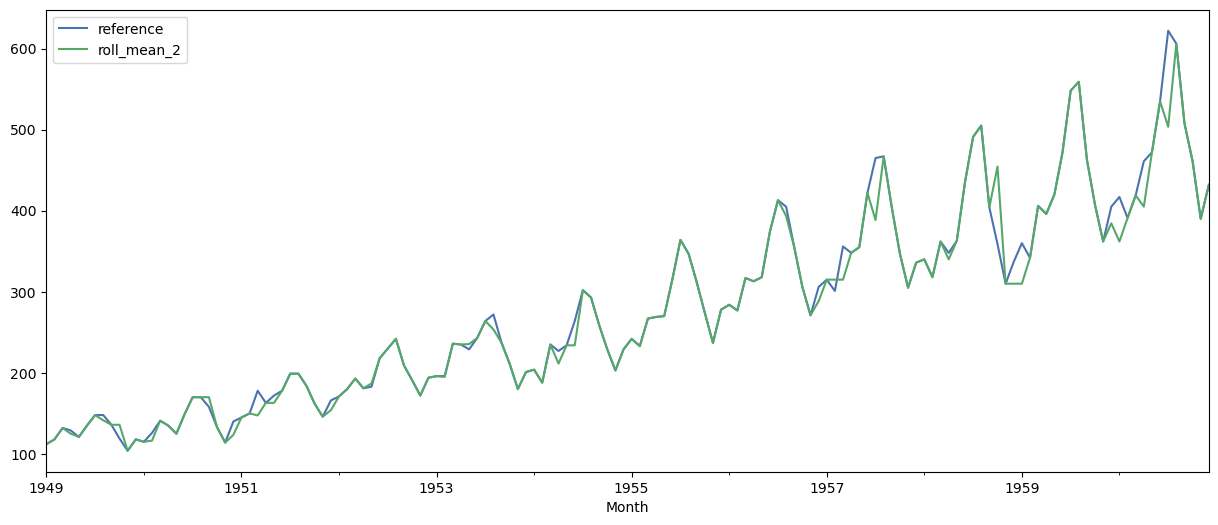

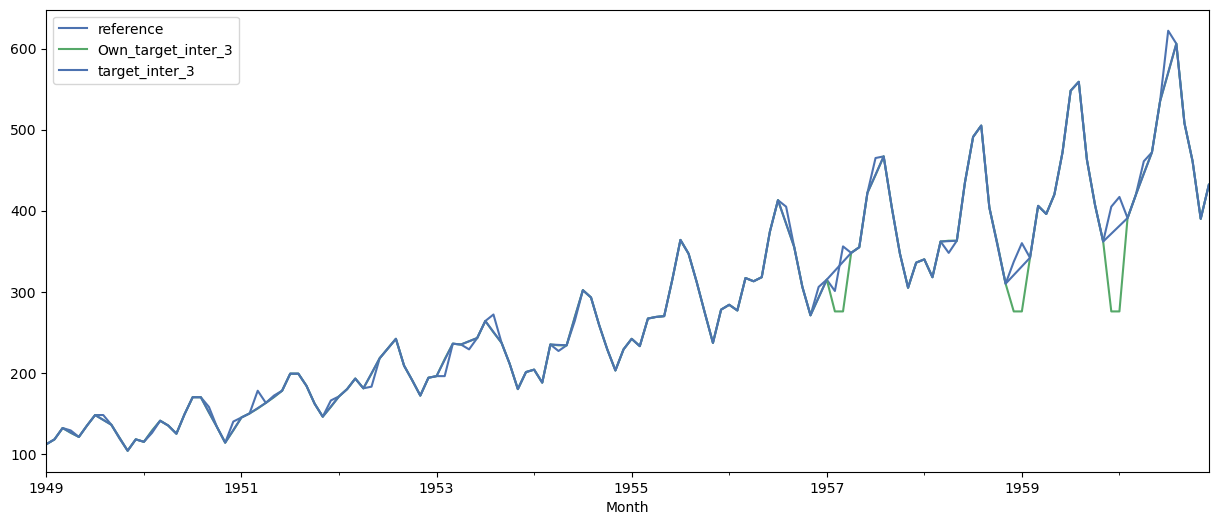

In [450]:
colors = ['#4c72b0', '#55a868']

df[['reference', 'target_shift_1']].plot(figsize=(15,6), color=colors)
df[['reference', 'roll_mean_2']].plot(figsize=(15,6), color=colors)
df[['reference', 'Own_target_inter_3', 'target_inter_3']].plot(figsize=(15,6), color=colors)
plt.show();

<Axes: xlabel='Month'>

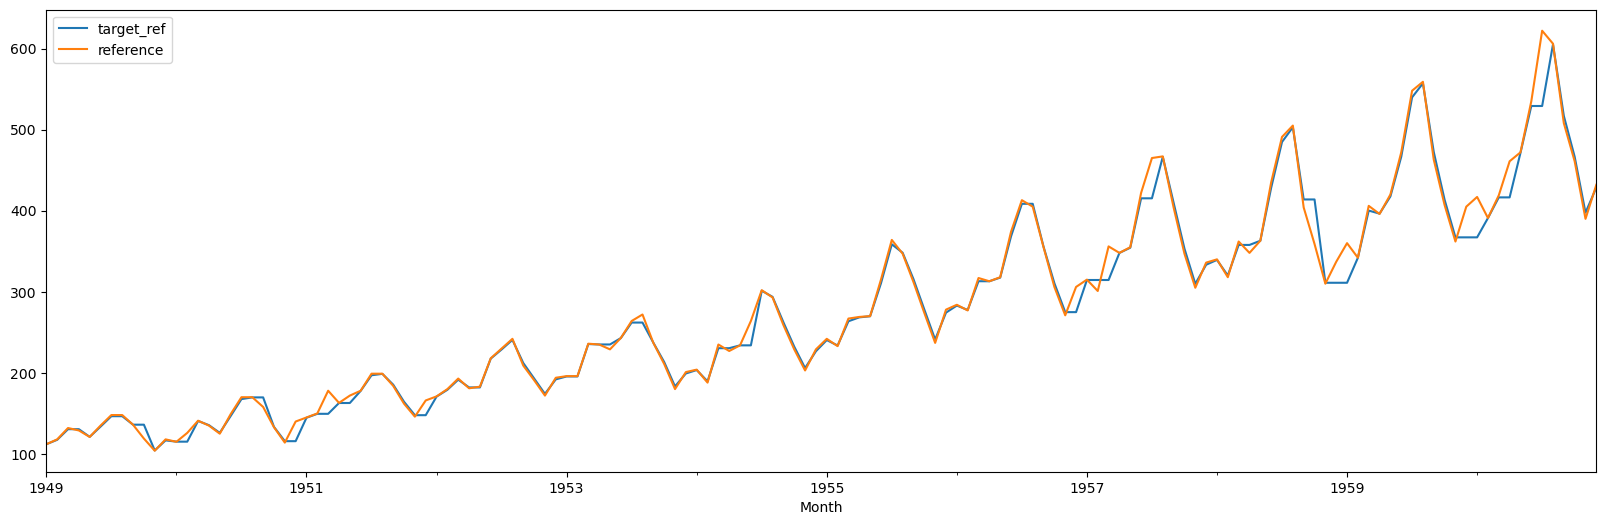

In [451]:
df['target_ref'] = df['target'].ewm(alpha=0.9).mean()
df[['target_ref', 'reference']].plot(figsize=(20,6))

In [452]:
df['Month'] = pd.to_datetime(df['Month'])

d = 0.5

first_value = df['target'].dropna().iloc[0]
smoothed_values = [first_value]

for t in range(1, len(df)):
    S_prev = smoothed_values[-1]
    x_t = df.loc[t, 'target']
    
    if pd.notna(x_t):  
        S_t = d * S_prev + (1 - d) * x_t
        smoothed_values.append(S_t)
    else:
        smoothed_values.append(S_prev) 

df['Smoothed_Target'] = smoothed_values


plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['target'], label='Исходные данные (target)', marker='o')
plt.plot(df['Month'], df['Smoothed_Target'], label='Сглаженные данные', color='red', marker='x')
plt.xlabel('Месяц')
plt.ylabel('Значение')
plt.title(f'Экспоненциальное сглаживание (d = {d}) для target')
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'Month'